In [305]:
import spacy

In [306]:
from statistics import mean 
import matplotlib.pyplot as plt
import re

In [307]:
with open ('na_zap_fronte.txt', 'r', encoding='windows-1251') as book1:
    zap_front = book1.read()
with open ('noch_v_lissabone.txt', 'r', encoding='windows-1251') as book2:
    lissabon = book2.read()
with open ('three_comrades.txt', 'r', encoding='windows-1251') as book3:
    three_comrades = book3.read()
with open ('triumfalnaya_arka.txt', 'r', encoding='windows-1251') as book4:
    triumf = book4.read()
with open ('vremya_zhit.txt', 'r', encoding='windows-1251') as book5:
    vremya = book5.read()
with open ('vzaimy.txt', 'r', encoding='windows-1251') as book6:
    vzaimy = book6.read()

In [195]:
nlp = spacy.load('ru_core_news_sm')

In [217]:
zap_front_tok = nlp(zap_front)
lissabon_tok = nlp(lissabon)
three_comrades_tok = nlp(three_comrades)
triumf_tok = nlp(triumf)
vremya_tok = nlp(vremya)
vzaimy_tok = nlp(vzaimy)

### Средняя длина предложений

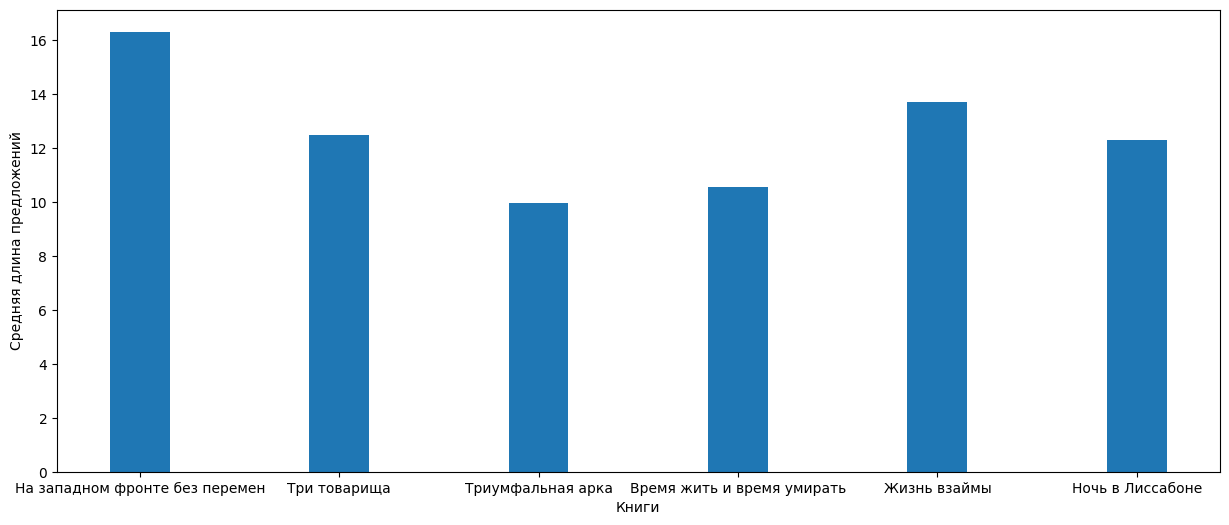

{'На западном фронте без перемен': 16.3, 'Три товарища': 12.48, 'Триумфальная арка': 9.96, 'Время жить и время умирать': 10.54, 'Жизнь взаймы': 13.68, 'Ночь в Лиссабоне': 12.28}


In [308]:
def sent_length(book_tok):
    sent_length = []
    for sentence in book_tok.sents:
        sent_length.append(len(sentence))
    return round(mean(sent_length),2)

sent_length_dict = {
    "На западном фронте без перемен": sent_length(zap_front_tok),
    "Три товарища": sent_length(three_comrades_tok),
    "Триумфальная арка": sent_length(triumf_tok),
    "Время жить и время умирать": sent_length(vremya_tok),
    "Жизнь взаймы": sent_length(vzaimy_tok),
    "Ночь в Лиссабоне": sent_length(lissabon_tok)
}
plt.figure(figsize=(15, 6))
plt.bar(sent_length_dict.keys(), sent_length_dict.values(), width=0.3)

plt.xlabel('Книги')
plt.ylabel('Средняя длина предложений')

plt.show()
print(sent_length_dict)

В среднем, после написания книги На западном фронте без перемен, количество слов в предложениях в книгах Ремарка идет на спад. Можно наблюдать увеличение длины предложений после написания Триумфальной Арки. В это период была написана книга, которая на втором месте по длине предложений - Жизнь взаймы. После этой книги длина предложений опять уменьшается.

### Виды предложений 

In [309]:
def sentence_structure_check(book_tok):
    dependencies = []
    sent_structure_dict ={
        'Пассивный залог':0,
        'Вопросительное предложение': 0,
        'Сложное предложение': 0,
        'Простое предложение': 0,
        'Восклицательное предложение': 0,
    }
    for sentence in book_tok.sents:
        dependencies = [token.dep_ for token in sentence]
        tokens = [token.text for token in sentence]
        if 'aux:pass' in dependencies:
            sent_structure_dict['Пассивный залог'] += 1 
        if any(token.dep_ in ['nsubj', 'nsubj:pass'] and token.head.dep_ in ('advcl', 'relcl', 'acl', 'ccomp', 'xcomp', 'conj', 'parataxis') for token in sentence):
            sent_structure_dict['Сложное предложение']+=1   
        else:
            sent_structure_dict['Простое предложение']+=1   
        if '?' in tokens:
            sent_structure_dict['Вопросительное предложение']+=1
        if '!' in tokens:
            sent_structure_dict['Восклицательное предложение']+=1
    for sent, count in sent_structure_dict.items():
         sent_structure_dict[sent] = round(count / len(list(book_tok.sents)),3)
    
         
    return sent_structure_dict



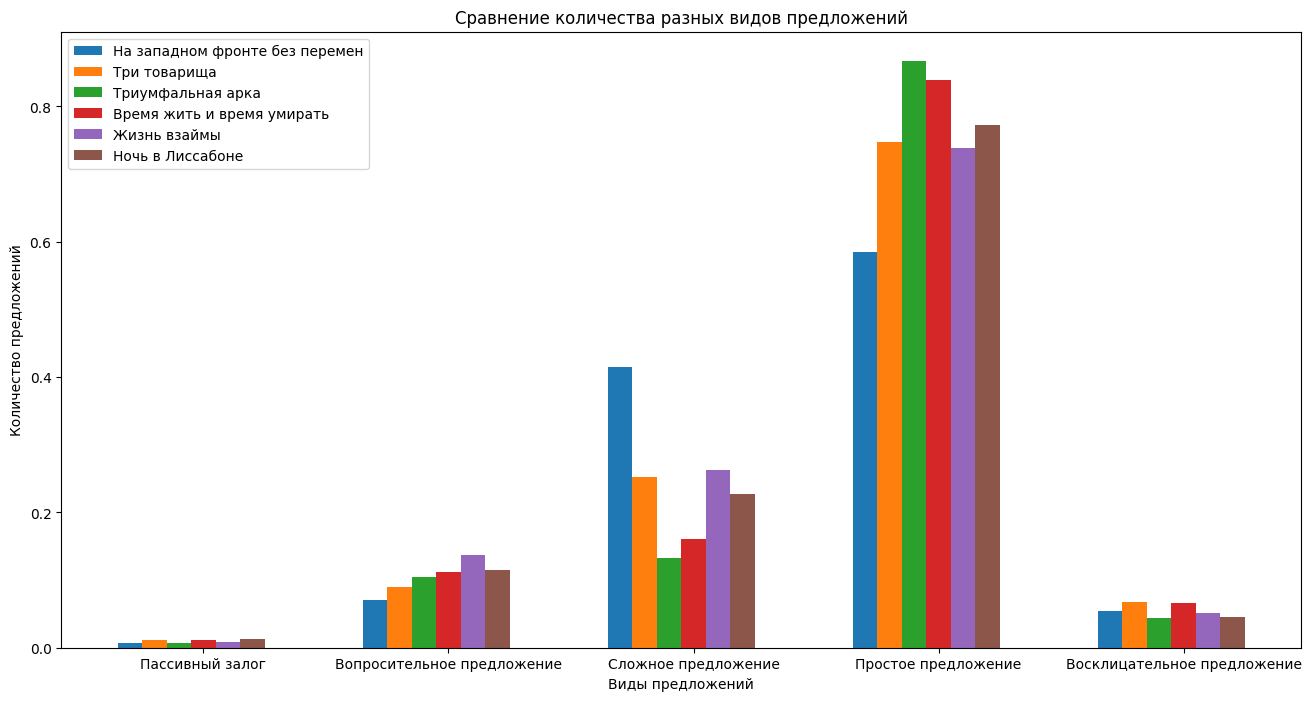

In [312]:
import numpy as np

sent_dicts = [sentence_structure_check(zap_front_tok),sentence_structure_check(three_comrades_tok), sentence_structure_check(triumf_tok), sentence_structure_check(vremya_tok), sentence_structure_check(vzaimy_tok), sentence_structure_check(lissabon_tok)]

keys = list(sent_dicts[0].keys()) #список ключей
values_list = [[dict[key] for key in keys] for dict in sent_dicts] # получаем список значений

fig, ax = plt.subplots(figsize=(16, 8))  # ширина высота
bar_width = 0.10
index = np.arange(len(keys))
book_names = ["На западном фронте без перемен","Три товарища","Триумфальная арка","Время жить и время умирать","Жизнь взаймы","Ночь в Лиссабоне"]

# стоблики для каждого словаря 
for i, values in enumerate(values_list): 
    plt.bar(index + i * bar_width, values, bar_width, label=book_names[i])

plt.xlabel('Виды предложений')
plt.ylabel('Количество предложений')
plt.title('Сравнениe количества разных видов предложений')
plt.xticks(index+0.3, keys)
plt.legend()

Во всех книгах Ремарка чаще встречаются простые предложения. Их доля в тексте росла до написания книги Триумфальная арка и стала падать после. Обратное мы видим в случае сложных предложений (что логично). <br>
Количество вопросительных предложений в книгах плавно росло и пошло на спад с написанием книги Ночь в Лиссабоне. Количество восклицательных предложений от книги к книге сильно не менялось <br>
Доля предложений в пассивном залоге очень мала, что скорее всего является особенностью русского языка. Было бы интересно сравнить с долей предложений в пассивном залоге в немецкой или английской версиях книг.



### Количество прямой речи 

In [293]:
def dialog(book, book_tok):
    pattern = r'[-–—].*'
    matches = re.findall(pattern, book)
    return round(len(matches)/len(list(book_tok.sents)), 3)

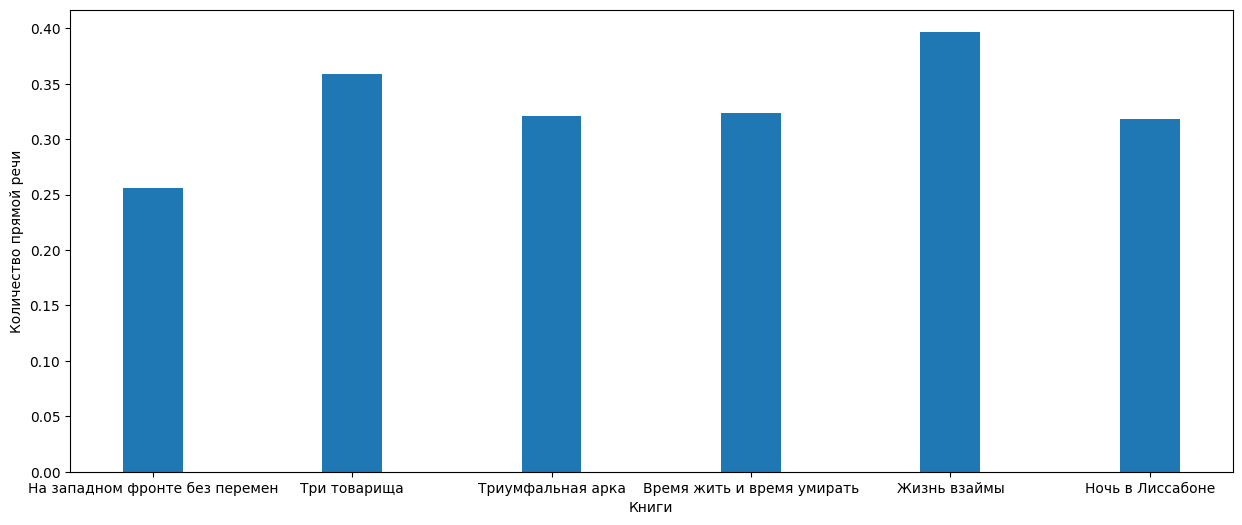

{'На западном фронте без перемен': 0.256, 'Три товарища': 0.359, 'Триумфальная арка': 0.321, 'Время жить и время умирать': 0.324, 'Жизнь взаймы': 0.397, 'Ночь в Лиссабоне': 0.318}


In [311]:
dialog_dict = {
    
    "На западном фронте без перемен": dialog(zap_front, zap_front_tok),
    "Три товарища": dialog(three_comrades, three_comrades_tok ),
    "Триумфальная арка": dialog(triumf, triumf_tok ),
    "Время жить и время умирать": dialog(vremya, vremya_tok),
    "Жизнь взаймы": dialog(vzaimy, vzaimy_tok),
    "Ночь в Лиссабоне": dialog(lissabon, lissabon_tok)
}

plt.figure(figsize=(15, 6))
plt.bar(dialog_dict.keys(), dialog_dict.values(), width=0.3)

plt.xlabel('Книги')
plt.ylabel('Количество прямой речи')

plt.show()
print(dialog_dict)


Доля прямой речи в книгах Ремарка выросла после написания книги На западном фронте без перемен, и в дальнейшем сильно не изменялась. Больше всего прямой речи наблюдается в более поздний период его творчества - в книге Жизнь взаймы.